# Ames Housing Data and Kaggle Challenge

## Problem Statement

## Background

## Data Preparation and Cleaning

### Libraries and Settings

In [1]:
# Import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pylab as pylab

sns.set_theme(style = 'white')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option("display.max_columns", None)


In [2]:
# Visualization 

sns.set_theme(style = 'white')

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)



### Data import

In [3]:
# Train
df_original_train = pd.read_csv("../datasets/train.csv")

print(df_original_train.shape)

(2051, 81)


In [4]:
# Test
df_original_test = pd.read_csv("../datasets/test.csv")

print(df_original_test.shape)
df_original_test = df_original_test.sort_values(by = 'Id') # sort by Id so that it can be used for submission

(878, 80)


In [5]:
# Example submission
df_original_ex = pd.read_csv("../datasets/sample_sub_reg.csv")
df_original_ex.shape

(878, 2)

### Data First Look

In [6]:
df_original_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
df_original_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Data Dictionary

The data dictionary consists of `Feature Label`, `Description` and `Categories`. 

Also, for the purpose of our analysis, we have added `Aspect of house` which is the particular component/aspect of the house which the feature belongs to, and the `Data Type` which tells us if the feature is nominal, ordinal or numeric

|Feature Label  |Description                                                           |Categories                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |Aspect of house|Data Type|
|---------------|----------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------|---------|
|Id             |Unique ID                                                             |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Unrelated      |None     |
|PID            |Parcel Identification Number assigned to each property within the Ames|None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Unrelaed       |None     |
|MS SubClass    |The building class                                                    |20: 1-STORY 1946 & NEWER ALL STYLES / 30: 1-STORY 1945 & OLDER / 40: 1-STORY W/FINISHED ATTIC ALL AGES / 45: 1-1/2 STORY - UNFINISHED ALL AGES / 50: 1-1/2 STORY FINISHED ALL AGES / 60: 2-STORY 1946 & NEWER / 70: 2-STORY 1945 & OLDER / 75: 2-1/2 STORY ALL AGES / 80: SPLIT OR MULTI-LEVEL / 85: SPLIT FOYER / 90: DUPLEX - ALL STYLES AND AGES / 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER / 150: 1-1/2 STORY PUD - ALL AGES / 160: 2-STORY PUD - 1946 & NEWER / 180: PUD - MULTILEVEL - INCL SPLIT LEV/FOYER / 190: 2 FAMILY CONVERSION - ALL STYLES AND AGES|Type           |Nominal  |
|MS Zoning      |Identifies the general zoning classification of the sale              |A: Agriculture / C: Commercial / FV: Floating Village Residential / I: Industrial / RH: Residential High Density / RL: Residential Low Density / RP: Residential Low Density Park / RM: Residential Medium Density                                                                                                                                                                                                                                                                                                                                    |Administrative |Nominal  |
|Lot Frontage   |Linear feet of street connected to property                           |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Environment    |Numeric  |
|Lot Area       |Lot size in square feet                                               |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Land           |Numeric  |
|Street         |Type of road access to property                                       |Grvl: Gravel / Pave: Paved                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |Environment    |Nominal  |
|Alley          |Type of alley access to property                                      |Grvl: Gravel / Pave: Paved / NA: No alley access                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |Environment    |Nominal  |
|Lot Shape      |General shape of property                                             |Reg: Regular / IR1: Slightly irregular / IR2: Moderately Irregular / IR3: Irregular                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |Land           |Nominal  |
|Land Contour   |Flatness of the property                                              |Lvl: Near Flat/Level / Bnk: Banked - Quick and significant rise from street grade to building / HLS: Hillside - Significant slope from side to side / Low Depression                                                                                                                                                                                                                                                                                                                                                                                  |Land           |Nominal  |
|Utilities      |Type of utilities available                                           |AllPub: All public Utilities (E,G,W,& S) / NoSewr: Electricity, Gas, and Water (Septic Tank) / NoSeWa: Electricity and Gas Only / ELO: Electricity only                                                                                                                                                                                                                                                                                                                                                                                               |Utility        |Nominal  |
|Lot Config     |Lot configuration                                                     |Inside: Inside lot / Corner: Corner lot / CulDSac: Cul-de-sac / FR2: Frontage on 2 sides of property / FR3: Frontage on 3 sides of property                                                                                                                                                                                                                                                                                                                                                                                                           |Environment    |Nominal  |
|Land Slope     |Slope of property                                                     |Gtl: Gentle slope / Mod: Moderate Slope / Sev: Severe Slope                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |Land           |Nominal  |
|Neighborhood   |Physical locations within Ames city limit                             |Value represents unique neighbourhoods in Ames                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |Environment    |Nominal  |
|Condition 1    |Proximity to main road or railroad                                    |Artery: Adjacent to arterial street / Feedr: Adjacent to feeder street / Norm: Normal / RRNn: Within 200' of North-South Railroad / RRAn: Adjacent to North-South Railroad / PosN: Near positive off-site feature--park, greenbelt, etc. / PosA: Adjacent to postive off-site feature / RRNe: Within 200' of East-West Railroad / RRAe: Adjacent to East-West Railroad                                                                                                                                                                                |Environment    |Nominal  |
|Condition 2    |Proximity to main road or railroad (if a second is present)           |Same as Condition 1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |Environment    |Nominal  |
|Bldg Type      |Type of dwelling                                                      |1Fam: Single-family Detached / 2FmCon: Two-family Conversion; originally built as one-family dwelling / Duplx: Duplex / TwnhsE: Townhouse End Unit / TwnhsI: Townhouse Inside Unit                                                                                                                                                                                                                                                                                                                                                                    |Type           |Nominal  |
|House Style    |Style of dwelling                                                     |1Story: One story / 1.5Fin: One and one-half story: 2nd level finished / 1.5Unf: One and one-half story: 2nd level unfinished / 2Story: Two story / 2.5Fin: Two and one-half story: 2nd level finished / 2.5Unf: Two and one-half story: 2nd level unfinished / SFoyer: Split Foyer / SLvl: Split Level                                                                                                                                                                                                                                               |Overall        |Nominal  |
|Overall Qual   |Overall material and finish quality                                   |10 Very Excellent / 9 Excellent / 8 Very Good / 7 Good / 6 Above Average / 5 Average / 4 Below Average / 3 Fair / 2 Poor / 1 Very Poor                                                                                                                                                                                                                                                                                                                                                                                                                |Overall        |Ordinal  |
|Overall Cond   |Overall condition rating                                              |Same as Overall Qual                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Overall        |Ordinal  |
|Year Built     |Original construction date                                            |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Age            |Numeric  |
|Year Remod/Add |Remodel date (same as construction date if no remodeling or additions)|None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Age            |Numeric  |
|Roof Style     |Type of roof                                                          |Flat: Flat / Gable: Gable / Gambrel: Gabrel (Barn) / Hip: Hip / Mansard: Mansard / Shed: Shed                                                                                                                                                                                                                                                                                                                                                                                                                                                         |Roof           |Nominal  |
|Roof Matl      |Roof material                                                         |ClyTile: Clay or Tile / CompShg: Standard (Composite) Shingle / Membran: Membrane / Metal: Metal / Roll: Roll / Tar&Grv: Gravel & Tar / WdShake: Wood Shakes / WdShngl: Wood Shingles                                                                                                                                                                                                                                                                                                                                                                 |Roof           |Nominal  |
|Exterior 1st   |Exterior covering on house                                            |AsbShng: Asbestos Shingles / AsphShn: Asphalt Shingles / BrkComm: Brick Common / BrkFace: Brick Face / CBlock: Cinder Block / CemntBd: Cement Board / HdBoard: Hard Board / ImStucc: Imitation Stucco / MetalSd: Metal Siding / Other: Other / Plywood:Plywood / PreCast: PreCast / Stone: Stone / Stucco: Stucco / VinylSd: Vinyl Siding / Wd Sdng: Wood Siding / WdShing: Wood Shingles                                                                                                                                                             |Facade         |Nominal  |
|Exterior 2nd   |Exterior covering on house (if more than one material)                |Same as Exterior 1st                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Facade         |Nominal  |
|Mas Vnr Type   |Masonry veneer type                                                   |BrkCmn: Brick Common / BrkFace: Brick Face / Cblock: Cinder Block / None: None / Stone: Stone                                                                                                                                                                                                                                                                                                                                                                                                                                                         |Facade         |Nominal  |
|Mas Vnr Area   |Masonry veneer area in square feet                                    |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Facade         |Numeric  |
|Exter Qual     |Exterior material quality                                             |Ex: Excellent / Gd: Good / TA: Average/Typical / Fa: Fair / Po: Poor                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Facade         |Ordinal  |
|Exter Cond     |Present condition of the material on the exterior                     |Same as Exter Qual                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |Facade         |Ordinal  |
|Foundation     |Type of foundation                                                    |BrkTil: Brick & Tile / Cblock: Cinder Block / Pconc: Poured Contrete / Slab: Slab / Stone: Stone / Wood: Wood                                                                                                                                                                                                                                                                                                                                                                                                                                         |Foundation     |Nominal  |
|Bsmt Qual      |Height of the basement                                                |Ex: Excellent (100+ inches) / Gd: Good (90-99 inches) / TA: Typical (80-89 inches) / Fa: Fair (70-79 inches) / Po: Poor (<70 inches) / NA: No Basement                                                                                                                                                                                                                                                                                                                                                                                                |Basement       |Ordinal  |
|Bsmt Cond      |General condition of the basement                                     |Ex: Excellent / Gd: Good / TA: Typical - slight dampness allowed / Fa: Fair - dampness or some cracking or settling / Po: Poor - Severe cracking, settling, or wetness / NA: No Basement                                                                                                                                                                                                                                                                                                                                                              |Basement       |Ordinal  |
|Bsmt Exposure  |Walkout or garden level basement walls                                |Gd: Good Exposure / Av: Average Exposure (split levels or foyers typically score average or above) / Mn: Mimimum Exposure / No: No Exposure / NA: No Basement                                                                                                                                                                                                                                                                                                                                                                                         |Basement       |Ordinal  |
|BsmtFin Type 1 |Quality of basement finished area                                     |GLQ: Good Living Quarters / ALQ: Average Living Quarters / BLQ: Below Average Living Quarters / Rec: Average Rec Room / LwQ: Low Quality / Unf: Unfinshed / NA: No Basement                                                                                                                                                                                                                                                                                                                                                                           |Basement       |Ordinal  |
|BsmtFin SF 1   |Type 1 finished square feet                                           |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Basement       |Numeric  |
|BsmtFin Type 2 |Quality of second finished area (if present)                          |Same as BsmtFin Type 1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |Basement       |Ordinal  |
|BsmtFin SF 2   |Type 2 finished square feet                                           |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Basement       |Numeric  |
|Bsmt Unf SF    |Unfinished square feet of basement area                               |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Basement       |Numeric  |
|Total Bsmt SF  |Unfinished square feet of basement area                               |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Basement       |Numeric  |
|Heating        |Type of heating                                                       |Floor: Floor Furnace / GasA: Gas forced warm air furnace / GasW: Gas hot water or steam heat / Grav: Gravity furnace / OthW: Hot water or steam heat other than gas / Wall: Wall furnace                                                                                                                                                                                                                                                                                                                                                              |Utility        |Nominal  |
|Heating QC     |Heating quality and condition                                         |Ex: Excellent / Gd: Good / TA: Average/Typical / Fa: Fair / Po: Poor                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Utility        |Ordinal  |
|Central Air    |Central air conditioning                                              |N: No / Y: Yes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |Utility        |Ordinal  |
|Electrical     |Electrical system                                                     |SBrkr: Standard Circuit Breakers & Romex / FuseA: Fuse Box over 60 AMP and all Romex wiring (Average) / FuseF: 60 AMP Fuse Box and mostly Romex wiring (Fair) / FuseP: 60 AMP Fuse Box and mostly knob & tube wiring (poor) / Mix: Mixed                                                                                                                                                                                                                                                                                                              |Utility        |Ordinal  |
|1st Flr SF     |First Floor square feet                                               |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Above Grade    |Numeric  |
|2nd Flr SF     |Second floor square feet                                              |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Second Floor   |Numeric  |
|Low Qual Fin SF|Low quality finished square feet (all floors)                         |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Above Grade    |Numeric  |
|Gr Liv Area    |Above grade (ground) living area square feet                          |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Overall        |Numeric  |
|Bsmt Full Bath |Basement full bathrooms                                               |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Bathroom       |Numeric  |
|Bsmt Half Bath |Basement half bathrooms                                               |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Bathroom       |Numeric  |
|Full Bath      |Full bathrooms above grade                                            |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Bathroom       |Numeric  |
|Half Bath      |Half baths above grade                                                |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Bathroom       |Numeric  |
|Bedroom AbvGr  |Number of bedrooms above basement level                               |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Bedroom        |Numeric  |
|Kitchen AbvGr  |Number of kitchens                                                    |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Kitchen        |Numeric  |
|Kitchen Qual   |Kitchen quality                                                       |Ex:Excellent / Gd: Good / TA: Typical/Average / Fa: Fair / Po: Poor                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |Kitchen        |Ordinal  |
|TotRms AbvGrd  |Total rooms above grade (does not include bathrooms)                  |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Above Grade    |Numeric  |
|Functional     |Home functionality rating                                             |Typ: Typical Functionality / Min1: Minor Deductions 1 / Min2: Minor Deductions 2 / Mod: Moderate Deductions / Maj1: Major Deductions 1 / Maj2: Major Deductions 2 / Sev: Severely Damaged / Sal: Salvage only                                                                                                                                                                                                                                                                                                                                         |Overall        |Ordinal  |
|Fireplaces     |Number of fireplaces                                                  |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Utility        |Numeric  |
|Fireplace Qu   | Fireplace quality                                                    |Ex: Excellent - Exceptional Masonry Fireplace / Gd: Good - Masonry Fireplace in main level / TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement / Fa: Fair - Prefabricated Fireplace in basement / Po: Poor - Ben Franklin Stove / NA: No Fireplace                                                                                                                                                                                                                                                           |Utility        |Ordinal  |
|Garage Type    |Garage location                                                       |2Types: More than one type of garage / Attchd: Attached to home / Basment: Basement Garage / BuiltIn: Built-In (Garage part of house - typically has room above garage) / CarPort: Car Port / Detchd: Detached from home / NA: No Garage                                                                                                                                                                                                                                                                                                              |Garage         |Nominal  |
|Garage Yr Blt  |Year garage was built                                                 |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Age            |Numeric  |
|Garage Finish  |Interior finish of the garage                                         |Fin: Finished / RFn: Rough Finished / Unf: Unfinished / NA: No Garage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |Garage         |Ordinal  |
|Garage Cars    |Size of garage in car capacity                                        |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Garage         |Numeric  |
|Garage Area    |Size of garage in square feet                                         |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Garage         |Numeric  |
|Garage Qual    |Garage quality                                                        |Ex: Excellent / Gd: Good / TA: Typical/Average / Fa: Fair / Po: Poor / NA: No Garage                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Garage         |Ordinal  |
|Garage Cond    |Garage condition                                                      |Same as Garage Qual                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |Garage         |Ordinal  |
|Paved Drive    |Paved driveway                                                        |Y: Paved / P: Partial Pavement / N: Dirt/Gravel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |Driveway       |Ordinal  |
|Wood Deck SF   |Wood deck area in square feet                                         |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Porch/Garden   |Numeric  |
|Open Porch SF  |Open porch area in square feet                                        |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Porch/Garden   |Numeric  |
|Enclosed Porch |Enclosed porch area in square feet                                    |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Porch/Garden   |Numeric  |
|3Ssn Porch     |Three season porch area in square feet                                |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Porch/Garden   |Numeric  |
|Screen Porch   |Screen porch area in square feet                                      |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Porch/Garden   |Numeric  |
|Pool Area      |Pool area in square feet                                              |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Porch/Garden   |Numeric  |
|Pool QC        |Pool quality                                                          |Ex: Excellent / Gd: Good / TA: Average/Typical / Fa: Fair / NA: No Pool                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Porch/Garden   |Numeric  |
|Fence          |Fence quality                                                         |GdPrv: Good Privacy / MnPrv: Minimum Privacy / GdWo: Good Wood / MnWw: Minimum Wood/Wire / NA: No Fence                                                                                                                                                                                                                                                                                                                                                                                                                                               |Porch/Garden   |Nominal  |
|Misc Feature   |Miscellaneous feature not covered in other categories                 |Elev: Elevator / Gar2: 2nd Garage (if not described in garage section) / Othr: Other / Shed: Shed (over 100 SF) / TenC :Tennis Court / NA: None                                                                                                                                                                                                                                                                                                                                                                                                       |Overall        |Nominal  |
|Misc Val       |$Value of miscellaneous feature                                       |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Overall        |Numeric  |
|Mo Sold        |Month Sold                                                            |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Age            |Nominal  |
|Yr Sold        |Year Sold                                                             |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Age            |Numeric  |
|Sale Type      |Type of sale                                                          |WD: Warranty Deed - Conventional / CWD: Warranty Deed - Cash / VWD: Warranty Deed - VA Loan / New: Home just constructed and sold / COD: Court Officer Deed/Estate / Con: Contract 15% Down payment regular terms / ConLw: Contract Low Down payment and low interest / ConLI: Contract Low Interest / ConLD: Contract Low Down / Oth: Other                                                                                                                                                                                                          |Administrative |Nominal  |
|SalePrice      |The property's sale price in dollars. The response variable.          |None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |Price          |Numeric  |


### Data Cleaning

#### Merge Train and Test Set

To ensure similar structure of train and test sets, we will merge them into a single dataframe so that it is easier to perform data cleaning and feature engineering steps.

In [8]:
# First we add a column to label if it is from train or test set, so that it is easier to identify train and test sets
df_original_train['Train/Test'] = "Train"
df_original_test['Train/Test'] = "Test"

# Then we concat both into single dataframe
# Note that we will remove "SalePrice" from concatenation since it is not present in 
df_original_combined = pd.concat([df_original_train.drop("SalePrice", axis = 1), df_original_test])
print(df_original_combined.shape)
df_original_combined.tail()

(2929, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Train/Test
536,2919,923228210,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,34,0,0,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Test
178,2921,923228310,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Test
828,2922,923229110,90,RL,55.0,12640,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,Rec,936.0,LwQ,396.0,396.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1976.0,Unf,2.0,574.0,TA,TA,Y,40,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Test
668,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Test
674,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Test


#### Missing Data 

Let us visualize the missing data

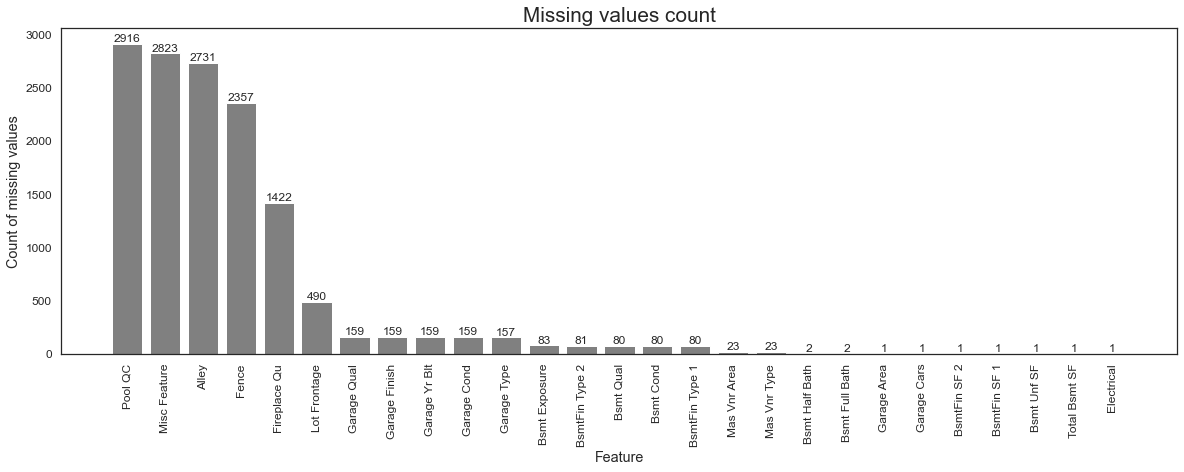

In [9]:
# barplot for features with more than 0 missing values in count
missing_ratio = (df_original_combined.isnull().sum()).sort_values(ascending = False)
plt.figure(figsize = (20, 6))
missing_val_bar = plt.bar(x = missing_ratio[missing_ratio>0].index, height = missing_ratio[missing_ratio>0],
                         color = 'grey')
plt.title("Missing values count")
plt.xlabel("Feature")
plt.ylabel("Count of missing values")
plt.bar_label(missing_val_bar);
plt.xticks(rotation = 90);

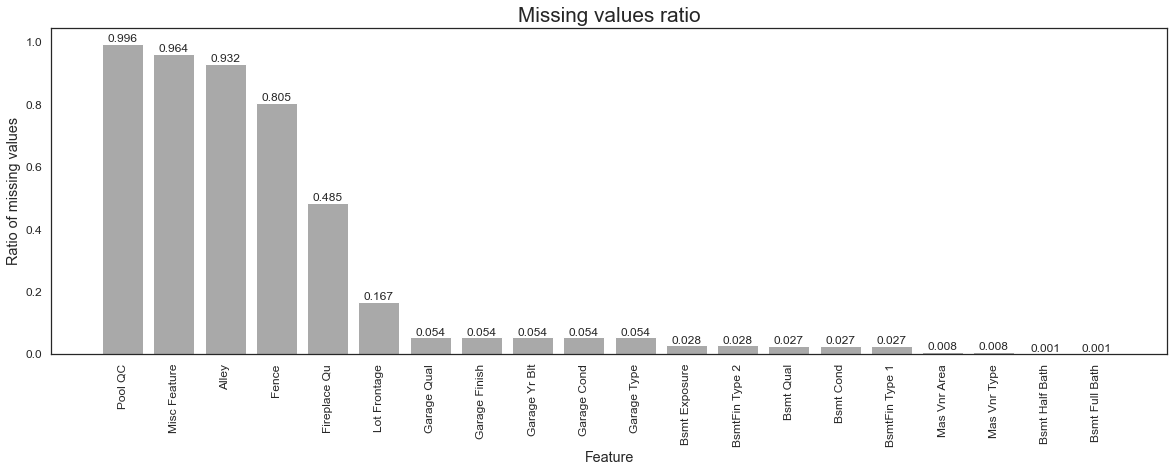

In [10]:
# barplot for features with more than 0 missing values in ratio
missing_ratio = (df_original_combined.isnull().sum()/df_original_combined.shape[0]).sort_values(ascending = False).round(3)
plt.figure(figsize = (20, 6))
missing_val_bar = plt.bar(x = missing_ratio[missing_ratio>0].index, height = missing_ratio[missing_ratio>0],
                         color = 'darkgrey')
plt.title("Missing values ratio")
plt.xlabel("Feature")
plt.ylabel("Ratio of missing values")
plt.bar_label(missing_val_bar);
plt.xticks(rotation = 90);

##### Missing due to absence

For some features, the missing value could result due to the absence of the said feature. Let us investigate if this is indeed the case.

###### Pool QC

For pool, we look to see if the `Pool Area` feature is 0, if it is, it indicates no pool.

In [11]:
(df_original_combined['Pool Area']==0).sum()

2916

There are 2042 values, same as the missing count of `Pool QC`. We will replace missing values with *NA*

In [12]:
df_original_combined['Pool QC'].fillna("NA", inplace = True)

Now we perform the same analysis for other missing values

###### Misc Feature

For `Misc Feature`, the data dictionary indicates that NA refers to No misc feature, so we fill the missing values with NA

In [13]:
df_original_combined['Misc Feature'].value_counts()

Shed    95
Gar2     5
Othr     4
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [14]:
df_original_combined['Misc Feature'].fillna("NA", inplace = True)

###### Alley

For `Alley`, the data dictionary indicates that NA refers to No Alley Access, so we fill the missing values with NA

In [15]:
# Note that currently NA is null value, so we replace with NA
df_original_combined['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [16]:
df_original_combined['Alley'].fillna("NA", inplace = True)

###### Fence

Same for `Fence`

In [17]:
df_original_combined['Fence'].value_counts()

MnPrv    330
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [18]:
df_original_combined['Fence'].fillna("NA", inplace = True)

###### Fireplace Qu

In [19]:
(df_original_combined['Fireplaces'] == 0).sum()

1422

In [20]:
df_original_combined['Fireplace Qu'].fillna("NA", inplace = True)

###### Garage

Other than `Garage Type`, other garage related features seem to have same number of missing values, these are probably houses with *no garage*.

We will first take a look at the 2 rows with missing values for other garage features but not `Garage Type`

In [21]:
(df_original_combined[(df_original_combined['Garage Qual'].isnull()) & (~df_original_combined['Garage Type'].isnull())])

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Train/Test
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,Train
764,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NA,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NA,MnPrv,Shed,1000,9,2008,WD,Test


Seems like these are `Garage Type` with *Detached Garage*.

For the row from training data, we will drop it.

However, we cannot drop the row from test dataframe, so we replace the missing values with 
- "Year Built" for "Garage Yr Blt", since from the plot below, it is likely that the garage will be built when the house is built
- *mode* value of the test dataframe with similar garage type, for the categorical features

,Garage Yr Blt,Year Built
Garage Yr Blt,1.000000,0.834771
Year Built,0.834771,1.000000


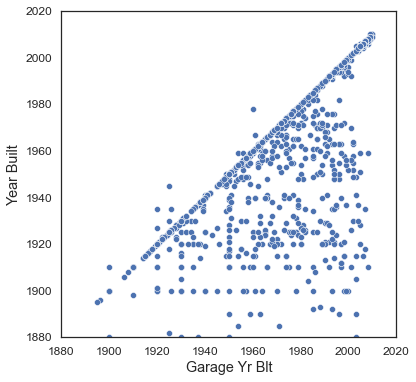

In [22]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df_original_combined, x = "Garage Yr Blt", y = "Year Built")
plt.xlim(1880, 2020)
plt.ylim(1880, 2020)
df_original_combined[["Garage Yr Blt", "Year Built"]].corr()

In [23]:
# Train: Filter out the row with PID
df_original_combined = df_original_combined[~(df_original_combined['PID'] == 910201180)]

In [23]:
"""# Test: fillna with either year built or mode
df_original_combined[(df_original_combined['PID'] == 903426160)] = df_original_combined[(df_original_combined['PID'] == 903426160)].fillna({
    "Garage Yr Blt": df_original_combined[(df_original_combined['PID'] == 903426160)]["Year Built"],
    "Garage Finish": df_original_test[df_original_test["Garage Type"] == "Detchd"]["Garage Finish"].mode()[0],
    "Garage Qual": df_original_test[df_original_test["Garage Type"] == "Detchd"]["Garage Qual"].mode()[0],
    "Garage Cond": df_original_test[df_original_test["Garage Type"] == "Detchd"]["Garage Cond"].mode()[0]
})"""

In [24]:
df_original_combined[(df_original_combined['PID'] == 903426160)][["Garage Yr Blt", "Garage Qual", "Garage Qual", "Garage Cond"]]

,Garage Yr Blt,Garage Qual,Garage Qual,Garage Cond
764,1910.0,TA,TA,TA


Now we tackle the missing values for garage features with no garage. Similar to previous case, we will fill missing values with relevant values while taking note to prevent leakage by restricting replacement to either statistics from train or test set

In [ ]:
"""# Test: fillna for train and test data
df_original_combined = df_original_combined.fillna({
    "Garage Yr Blt": df_original_combined[(df_original_combined['PID'] == 903426160)]["Year Built"],
    "Garage Finish": df_original_test[df_original_test["Garage Type"] == "Detchd"]["Garage Finish"].mode()[0],
    "Garage Qual": df_original_test[df_original_test["Garage Type"] == "Detchd"]["Garage Qual"].mode()[0],
    "Garage Cond": df_original_test[df_original_test["Garage Type"] == "Detchd"]["Garage Cond"].mode()[0]
})"""

### Feature Engineering

### Feature Selection

### Data Dictionary

## Exploratory Data Analysis

## Modelling 

### Pre-processing

### Model Fitting

### Model Evaluation

## Conclusions and Recommendations

## Test Submission

In [8]:
X = df_original_train[['Yr Sold']]
y = df_original_train['SalePrice']

In [9]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Modelling 
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [10]:
# Predict
submission_X = df_original_test[['Yr Sold']]
prediction = lr.predict(submission_X)

In [11]:
# Join prediction to df
submission_df = pd.concat([df_original_test['Id'], pd.Series(prediction, name = 'SalePrice')], axis = 1)
#submission_df.to_csv("test_prediction.csv", index = False)
